In [18]:
import gzip         # for reading .pkl.gz
import pickle       # to load the pickled dicts
import numpy as np  # for arrays, math
import matplotlib.pyplot as plt  # for plotting
from sklearn.metrics import r2_score
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm


In [19]:
test_1000 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_04_21__12_33_00.pkl.gz"
with gzip.open(test_1000, 'rb') as f:
    DATA_dict = pickle.load(f)

In [20]:
list(DATA_dict)


['counter_dict',
 'bed_dict',
 'base_dict',
 'surf_dict',
 'sed_dict',
 'H_dict',
 'us_dict',
 'ub_dict',
 'Hs_dict',
 'GL_dict',
 'Qs_dict',
 'SMB_dict']

In [21]:
bed_dict = DATA_dict['bed_dict']
base_dict = DATA_dict['base_dict']
surf_dict = DATA_dict['surf_dict']
sed_dict = DATA_dict['sed_dict']
H_dict = DATA_dict['H_dict']
us_dict = DATA_dict['us_dict']
ub_dict = DATA_dict['ub_dict']
Hs_dict = DATA_dict['Hs_dict']
GL_dict = DATA_dict['GL_dict']
Qs_dict = DATA_dict['Qs_dict']
SMB_dict = DATA_dict['SMB_dict']

In [22]:
# final_time = list(_dict)[-1]
# print(final_time)


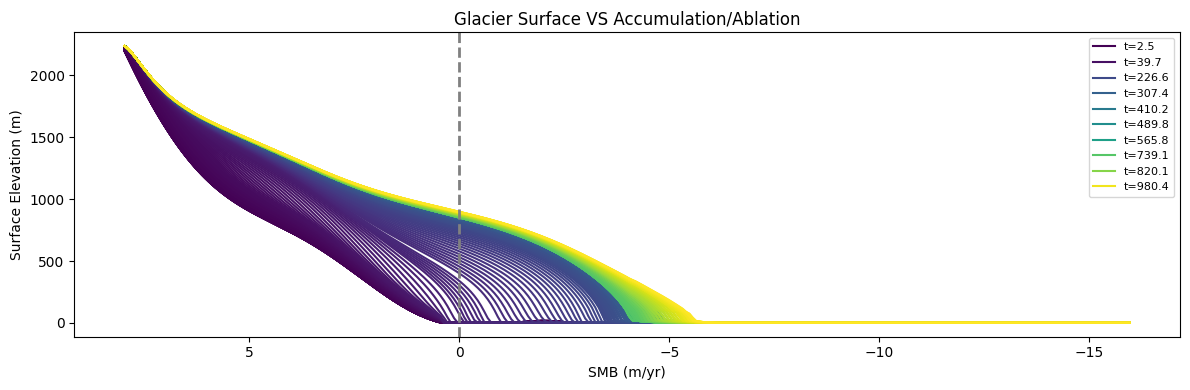

In [36]:
num_points = len(next(iter(surf_dict.values())))  # number of spatial points
timesteps = sorted(SMB_dict.keys())
smb_profile = SMB_dict[timesteps[0]] 
norm = plt.Normalize(min(timesteps), max(timesteps))
cmap = cm.viridis

plt.figure(figsize=(12,4))

for i, t in enumerate(timesteps):
    if i % 50 == 0:  
        continue

    surf = surf_dict[t]
    color = cmap(norm(t))
    plt.plot(smb_profile, surf, color=color, label=f't={t:.1f}' if i % 25 == 0 else "")

plt.xlabel("SMB (m/yr)")
plt.ylabel("Surface Elevation (m)")
plt.title("Glacier Surface VS Accumulation/Ablation")
plt.gca().invert_xaxis() 
plt.legend(loc="best", fontsize=8)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# plt.colorbar(sm, label='Time (years)', ax=plt.gca())
plt.axvline(x=0, color='gray', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()